# What are features of F2 modes?

In response to the referee's comments on:

_<u>Section 3.3.2</u>: Is low flux the only clear defining characteristic of spurious F2 modes?  If these modes really don't correspond to any galaxy location, then it seems plausible that their other model values (e.g., ellipticity and scale length) could take on unreasonable values that might then lend themselves to culling criteria.  It would be nice to see some description of the parameter values derived for the F2 modes to further justify the choice of flux as the cutting parameter.  For instance, it might make more sense to perform a brightness cut (e.g., flux per unit angular area) rather than a flux cut. _

__To do this:__

1. Four different seeded runs of detecting a 20 source simulated population.

2. Run GalNest- what are the properties of the F2 modes?


In [3]:
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import subprocess 

l, m, s, a, e1, e2 = 0, 1, 2, 3, 4, 5

seed = 1
pkl_file = '../data/f2_modes/seed%s_8000_0.8_0.1_final.pkl' % seed
df = pd.read_pickle(pkl_file)
df_final = df[(df['above_cut'] > 0) & (df['max_in_cluster'] == True)]
df_f1modes = df[(df['max_in_cluster'] == False)]
df_f2modes = df[(df['above_cut'] < 1) & (df['max_in_cluster'] == True)]

df

,index,local log-evidence,local log-evidence error,maximum,maximum a posterior,mean,sigma,strictly local log-evidence,strictly local log-evidence error,cluster_id,max_in_cluster,above_cut,final
0,0,-9.280251e+06,0.044307,"[-0.004358378914639212, 0.007526930785158811, ...","[-0.004355931902783161, 0.007566111271629814, ...","[-0.004359797371450522, 0.007522617517971636, ...","[1.844917812295049e-05, 3.5482529286397524e-05...",-9.280251e+06,0.791066,7,True,0,0
1,1,-9.280191e+06,0.046532,"[0.0020971954304126266, -0.008483102024117298,...","[0.0020981591305062894, -0.008482435853121873,...","[0.0020962618350214997, -0.008484310150520355,...","[2.2793230690773566e-06, 1.937836253676138e-06...",-9.280191e+06,0.782988,1,True,1,1
2,2,-9.280136e+06,0.048517,"[-0.007668639806332876, -0.006550329643813567,...","[-0.007665827293475456, -0.006553134826726778,...","[-0.007668953340296057, -0.006552914990794052,...","[1.87741299073098e-06, 2.2249161660824786e-06,...",-9.280136e+06,1.079984,8,True,1,1
3,3,-9.279813e+06,0.054448,"[-0.00621802564130412, -0.007240915815740601, ...","[-0.006218279442163274, -0.007240408495134591,...","[-0.006217660025831735, -0.007240912176233041,...","[1.0539188517141458e-06, 1.0382635626240242e-0...",-9.279813e+06,0.399857,9,True,1,1
4,4,-9.279214e+06,0.061321,"[-0.007378346908594002, -0.0034898922165748037...","[-0.007378763842959067, -0.003489949404971097,...","[-0.007378246998858803, -0.003489974895433593,...","[1.0477915140274617e-06, 7.450748931122819e-07...",-9.279214e+06,0.318975,10,True,1,1
5,5,-9.280193e+06,0.047029,"[-0.00452288110245568, -0.005999340101113228, ...","[-0.004522962030041843, -0.006004068843918838,...","[-0.0045226300795388995, -0.006000680932808182...","[3.453177361953235e-06, 2.817611671837489e-06,...",-9.280193e+06,0.575193,11,True,1,1
6,6,-9.280195e+06,0.045849,"[-0.005779535826681813, 0.0052449197842610006,...","[-0.00578236283186524, 0.005247051276663912, 1...","[-0.005780661472767043, 0.00524758746050051, 1...","[4.448842564801376e-06, 5.046922459507482e-06,...",-9.280195e+06,0.566117,12,True,1,1
7,7,-9.270780e+06,0.062890,"[-0.0027699393920127377, 0.008160113530567777,...","[-0.002769597826683421, 0.008160212212149642, ...","[-0.002769951255483757, 0.00816014165680636, 1...","[3.8994308010691436e-07, 4.134114119207736e-07...",-9.270780e+06,0.106665,13,True,1,1
8,8,-9.280125e+06,0.048964,"[0.004703460132835169, -0.008031078530099801, ...","[0.004701266315900777, -0.00803333623300399, 1...","[0.004703765523544275, -0.008032530169764391, ...","[2.383920486597611e-06, 2.1697919566282473e-06...",-9.280125e+06,0.274638,14,True,1,1
9,9,-9.280029e+06,0.053610,"[0.0014393580255293444, -0.0027540518508495024...","[0.0014391928215088977, -0.0027545126367325284...","[0.0014392171236343523, -0.002753634435379837,...","[8.895187417155218e-07, 1.1770389530344627e-06...",-9.280029e+06,0.487180,15,True,1,1


## Ellipticities

The ellipticity estimates of F2 modes are not distinguishable from the true modes.

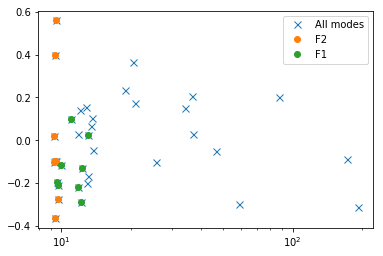

In [59]:
plt.clf()
plt.plot(df['mean'].str[s], df['mean'].str[e2], 'x', markersize=7, label='All modes')
plt.plot(df_f2modes['mean'].str[s], df_f2modes['mean'].str[e2], 'o', label='F2')
plt.plot(df_f1modes['mean'].str[s], df_f1modes['mean'].str[e2], 'o', label='F1')
plt.legend()
plt.xscale('log')
plt.show()

# Surface brightness

Define the surface brightness as:
\begin{equation}
B = \frac{S}{A}
\end{equation}
where $S$ is flux density and $A$ is angular area.



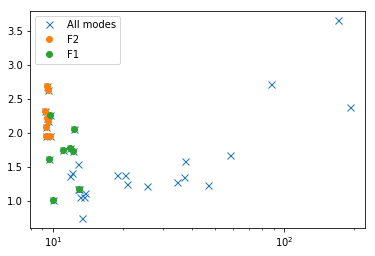

In [60]:
plt.clf()
plt.plot(df['mean'].str[s], df['mean'].str[a], 'x', markersize=7, label='All modes')
plt.plot(df_f2modes['mean'].str[s], df_f2modes['mean'].str[a], 'o', label='F2')
plt.plot(df_f1modes['mean'].str[s], df_f1modes['mean'].str[a], 'o', label='F1')
plt.legend()
plt.xscale('log')
plt.show()

In [70]:
plt.clf()
plt.plot(df_final['mean'].str[s], df_final['mean'].str[s]/np.power(df_final['mean'].str[a], 2.0), 'x', markersize=7, label='True modes')
plt.plot(df_f2modes['mean'].str[s], df_f2modes['mean'].str[s]/np.power(df_f2modes['mean'].str[a], 2.0), 'o', label='F2')
plt.plot(df_f1modes['mean'].str[s], df_f1modes['mean'].str[s]/np.power(df_f1modes['mean'].str[a], 2.0), 'o', label='F1')
plt.legend()
plt.xscale('log')
plt.ylabel('Surface brightness')
plt.xlabel('S [$\mu$Jy]')
plt.savefig('./paper_plots/surfacebrightness_fluxdensity.pdf')